# Kelompok 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("GGRM.csv", index_col='timestamp')
df

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,12150,12100,12250,12100,0
2001-04-17,12150,12100,12250,12100,0
2001-04-18,12150,12100,12250,12100,0
2001-04-19,12150,12100,12250,12100,0
2001-04-20,12150,12100,12250,12100,0
...,...,...,...,...,...
2023-01-02,18000,18000,18150,18025,218600
2023-01-03,18050,18000,18075,18000,320200
2023-01-04,18025,17500,18050,17625,1397300


# Preprocessing

In [3]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670 entries, 2001-04-16 to 2023-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   open    5670 non-null   int64
 1   low     5670 non-null   int64
 2   high    5670 non-null   int64
 3   close   5670 non-null   int64
 4   volume  5670 non-null   int64
dtypes: int64(5)
memory usage: 265.8+ KB


In [4]:
# Melihat apakah ada nilai null
df.isnull().sum()

open      0
low       0
high      0
close     0
volume    0
dtype: int64

In [5]:
# Melihat kolom yang ada di dataset
df.columns

Index(['open', 'low', 'high', 'close', 'volume'], dtype='object')

In [6]:
# Menampilkan korelasi
df.corr()

,open,low,high,close,volume
open,1.000000,0.999721,0.999713,0.999546,0.059930
low,0.999721,1.000000,0.999609,0.999725,0.055625
high,0.999713,0.999609,1.000000,0.999740,0.065072
close,0.999546,0.999725,0.999740,1.000000,0.060345
volume,0.059930,0.055625,0.065072,0.060345,1.000000


In [7]:
# Menampilkan statistik dari semua kolom dalam dataset
df.describe()

,open,low,high,close,volume
count,5670.000000,5670.000000,5670.000000,5670.000000,5.670000e+03
mean,35529.977954,35090.079365,35959.656085,35512.292769,1.001500e+06
std,23918.447332,23631.129188,24194.810747,23908.642599,1.289877e+06
min,3500.000000,3500.000000,3800.000000,3500.000000,0.000000e+00
25%,11300.000000,11100.000000,11400.000000,11300.000000,2.411750e+05
50%,35000.000000,34600.000000,35387.500000,35000.000000,7.497000e+05
75%,54500.000000,53850.000000,55068.750000,54500.000000,1.346000e+06
max,94300.000000,92600.000000,100975.000000,94400.000000,2.829980e+07


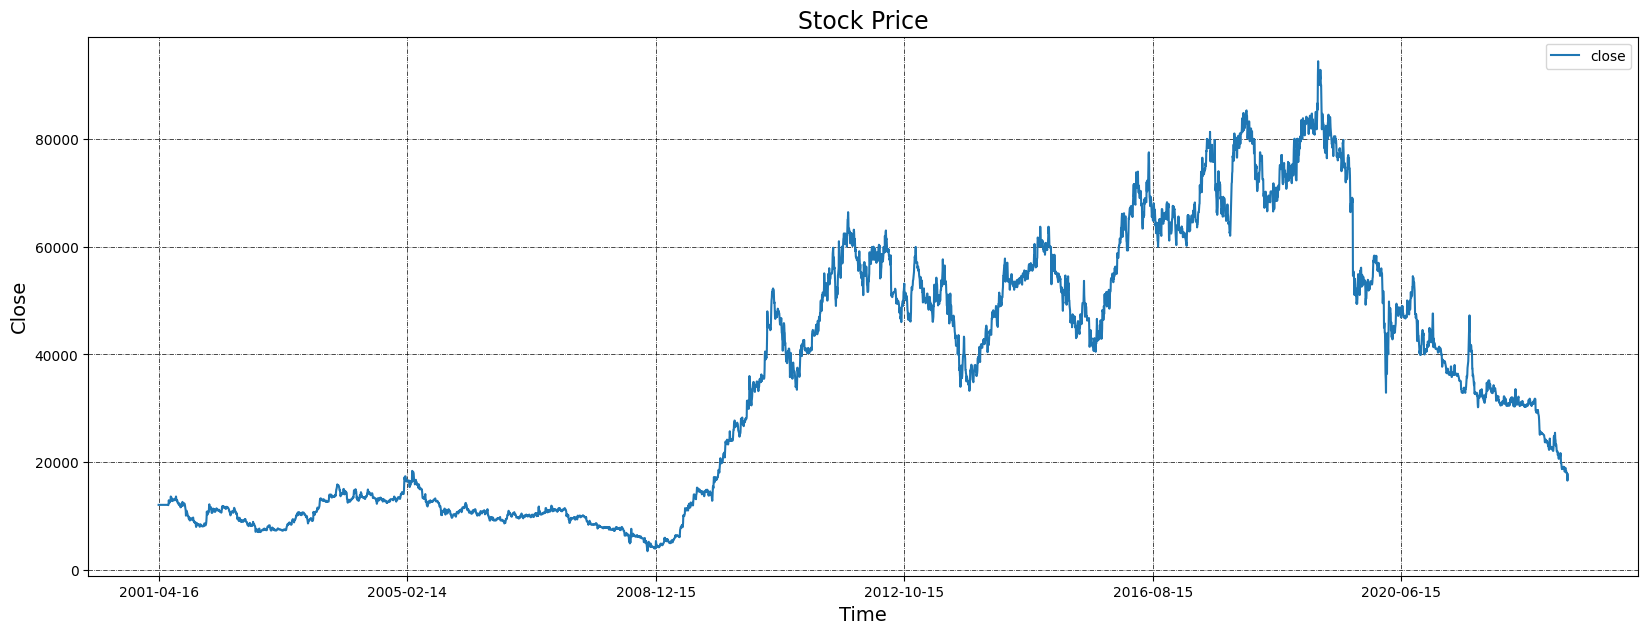

In [8]:
# Membuat plot harga saham GGRM dari tahun 2021-2023
df['close'].plot(figsize=(20, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Close', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

# Feature Engineering

In [9]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['average'] = df['low'] + df['high'] + df['open'] + df['close'] / 4
df

,open,low,high,close,volume,open-close,low-high,average
timestamp,,,,,,,,
2001-04-16,12150,12100,12250,12100,0,50,-150,39525.00
2001-04-17,12150,12100,12250,12100,0,50,-150,39525.00
2001-04-18,12150,12100,12250,12100,0,50,-150,39525.00
2001-04-19,12150,12100,12250,12100,0,50,-150,39525.00
2001-04-20,12150,12100,12250,12100,0,50,-150,39525.00
...,...,...,...,...,...,...,...,...
2023-01-02,18000,18000,18150,18025,218600,-25,-150,58656.25
2023-01-03,18050,18000,18075,18000,320200,50,-75,58625.00
2023-01-04,18025,17500,18050,17625,1397300,400,-550,57981.25


# Linear Regression


Training score: 1.00
Test score: 1.00


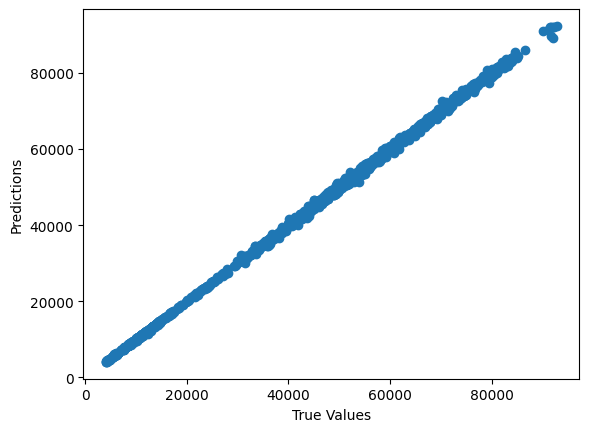

In [10]:
X = df[['open', 'low', 'high', 'volume']]
y = df['close']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, 
                                                    test_size=0.3, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

# Make predictions
predictions = model.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on training set:', mse_train)
print('MSE on testing set:', mse_test)

MSE on training set: 175261.86806893986
MSE on testing set: 189156.99924271507


In [12]:
# Predict the close values for the test set
y_pred = model.predict(X_test)

# Compare the predicted values with the actual values
prediction_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(prediction_df)

# Test prediksi manual (data per tanggal 31 mei 2023)
new_features = pd.DataFrame({'open': [27450], 'low': [27000], 'high': [27900], 'volume': [13495400]})
predicted_close = model.predict(new_features)
print('Predicted Close:', predicted_close[0])

            Actual     Predicted
timestamp                       
2017-04-07   68200  67981.957773
2004-08-11   13450  13462.223675
2006-09-26   10000   9939.889936
2007-03-12   10400  10369.417772
2021-08-25   32375  32379.779133
...            ...           ...
2014-04-07   50200  49802.652321
2021-05-27   32900  33194.850326
2022-12-29   18400  18339.581173
2021-12-31   30600  30610.391956
2017-01-31   61750  62695.686735

[1701 rows x 2 columns]
Predicted Close: 27363.072873306024


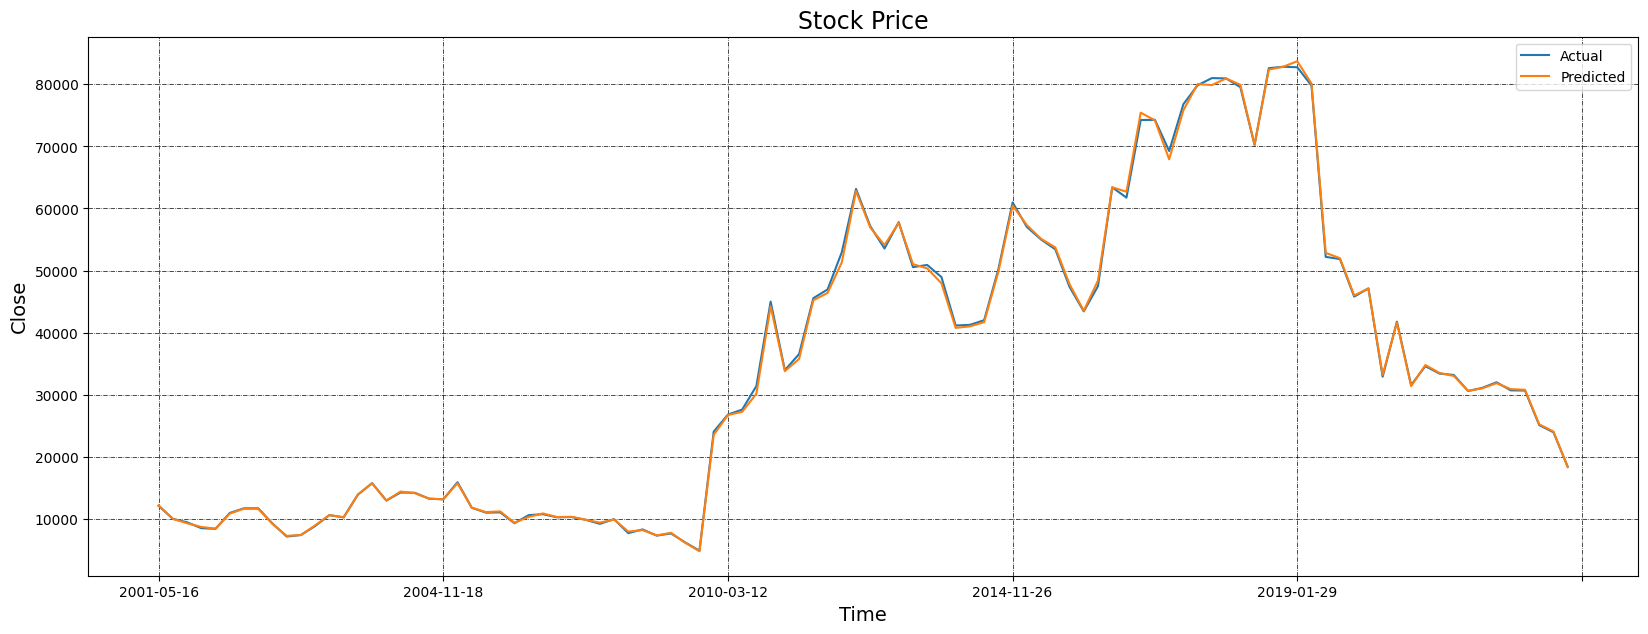

In [13]:
# Membuat plot perbandingan harga saham asli dengan yang diprediksi

temp = prediction_df.tail(100)
temp.sort_values(by='timestamp', inplace=True)

temp['Actual'].plot(figsize=(20, 7))
temp['Predicted'].plot(figsize=(20, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Close', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

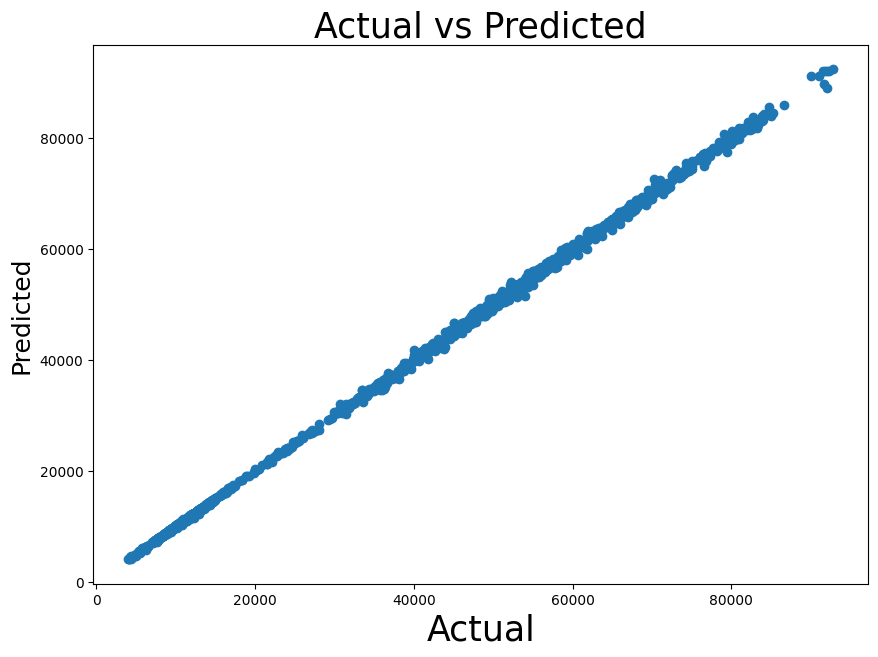

In [14]:
# Melihat korelasi nilai actual vs predicted

plt.figure(figsize=(10,7))
plt.title("Actual vs Predicted", fontsize=25)
plt.xlabel("Actual", fontsize=25)
plt.ylabel("Predicted", fontsize=18)
plt.scatter(x=prediction_df['Actual'], y=prediction_df['Predicted'])

In [15]:
# Melakukan evaluasi model regresi linear
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [-2.63918872e-01  6.48469183e-01  6.15272272e-01 -5.45589466e-06]
Mean Absolute Percentage Error: 0.007917396064955423
Coefficient of Determination: 0.9996780308348997


# SVM

In [16]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [17]:
X = df[['open', 'low', 'high', 'volume']]
y = np.where(df['close'].shift(-1) > df['close'], 1, 0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4536, 4) (1134, 4)


In [19]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [20]:
# Predict the close values for the test set
y_pred = cls.predict(X_test)

In [21]:
# Melakukan evaluasi model SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.60      0.96      0.74       685
           1       0.35      0.03      0.05       449

    accuracy                           0.59      1134
   macro avg       0.48      0.50      0.40      1134
weighted avg       0.50      0.59      0.47      1134



In [23]:
cm

array([[661,  24],
       [436,  13]], dtype=int64)

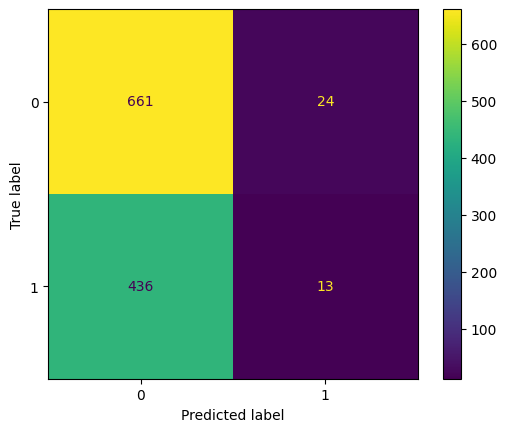

In [24]:
metrics.plot_confusion_matrix(cls, X_test, y_test)
plt.show()

In [25]:
# SVM Model Accuracy
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(Accuracy)

0.5943562610229277


In [26]:
df['Predicted_Signal'] = cls.predict(X)

# Menghitung daily returns
df['Return'] = df.close.pct_change()

# Menghitung strategy returns
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)

# Menghitung Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()

# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

df

,open,low,high,close,volume,open-close,low-high,average,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
timestamp,,,,,,,,,,,,,
2001-04-16,12150,12100,12250,12100,0,50,-150,39525.00,0,NaN,NaN,NaN,NaN
2001-04-17,12150,12100,12250,12100,0,50,-150,39525.00,0,0.000000,0.0,0.000000,0.000000
2001-04-18,12150,12100,12250,12100,0,50,-150,39525.00,0,0.000000,0.0,0.000000,0.000000
2001-04-19,12150,12100,12250,12100,0,50,-150,39525.00,0,0.000000,0.0,0.000000,0.000000
2001-04-20,12150,12100,12250,12100,0,50,-150,39525.00,0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,18000,18000,18150,18025,218600,-25,-150,58656.25,0,0.001389,0.0,1.852473,0.719067
2023-01-03,18050,18000,18075,18000,320200,50,-75,58625.00,0,-0.001387,-0.0,1.851086,0.719067
2023-01-04,18025,17500,18050,17625,1397300,400,-550,57981.25,0,-0.020833,-0.0,1.830253,0.719067


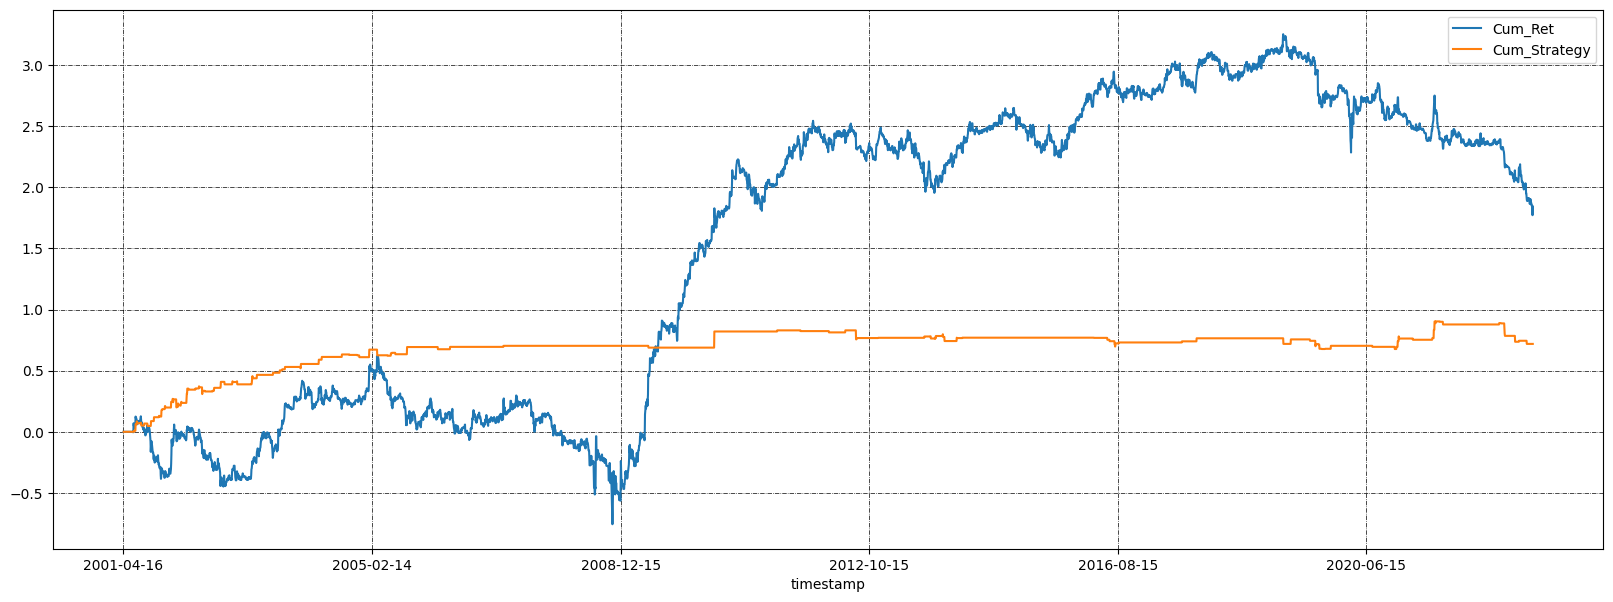

In [27]:
df['Cum_Ret'].plot(figsize=(20, 7))
df['Cum_Strategy'].plot(figsize=(20, 7))

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()